In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [12]:
# Set the random seed for reproducibility
np.random.seed(42)


#Create a synthetic dataset
data={
    'product_id': range(1,21),
    'product_name':[f'Product {i}' for i in range(1,21)],
    'category': np.random.choice(['Eletronics','Clothing','Home','Sports'],20),
    'units_sold': np.random.poisson(lam = 20,size =20),#Piosson distribution for sales
    'sale_date': pd.date_range(start = '2023-01-01' ,periods = 20, freq ='D')
}

sales_data = pd.DataFrame(data)

# Display the first few rows of the dataset
print("Sales Data :")
print(sales_data)

Sales Data :
    product_id product_name    category  units_sold  sale_date
0            1    Product 1        Home          25 2023-01-01
1            2    Product 2      Sports          15 2023-01-02
2            3    Product 3  Eletronics          17 2023-01-03
3            4    Product 4        Home          19 2023-01-04
4            5    Product 5        Home          21 2023-01-05
5            6    Product 6      Sports          17 2023-01-06
6            7    Product 7  Eletronics          19 2023-01-07
7            8    Product 8  Eletronics          16 2023-01-08
8            9    Product 9        Home          21 2023-01-09
9           10   Product 10    Clothing          21 2023-01-10
10          11   Product 11        Home          17 2023-01-11
11          12   Product 12        Home          22 2023-01-12
12          13   Product 13        Home          14 2023-01-13
13          14   Product 14        Home          17 2023-01-14
14          15   Product 15      Sports   

In [13]:
sales_data.to_csv('sales_data.csv', index = False)
#Path Location
import os
os.getcwd()

'C:\\Users\\bagal\\OneDrive\\Desktop\\statistical Project'

# Descriptive Statistics

In [14]:
#Descriptive statistics
descriptive_stats = sales_data['units_sold'].describe()

#Display descriptive statistics
print("\nDescriptive Statistics for Units Sold :")
print(descriptive_stats)

#Additional statistics
mean_sales = sales_data['units_sold'].mean()
median_sales = sales_data['units_sold'].median()
mode_sales = sales_data['units_sold'].mode()[0]
variance_sales = sales_data['units_sold'].var()
std_deviation_sales = sales_data['units_sold'].std()

#Group by category and calculate total and average sales
category_stats = sales_data.groupby('category')['units_sold'].agg(['sum', 'mean',  'std']).reset_index()
category_stats.columns = ['Category','Toatal Unit Sold','Average Units Sold','Std Dev Of Units Sold']


#Display the results
print("\nStatistical Analysis:")
print(f"Mean Units Sold:{mean_sales}")
print(f"Meadin Units Sold: {median_sales}")
print(f"Mode Units Sold:{mode_sales}")
print(f"Variance of Units Sold:{variance_sales}")
print(f"Standard Deviation of Units Sold:{std_deviation_sales}")
print("\nCategory Statistics:")
print(category_stats)




Descriptive Statistics for Units Sold :
count    20.000000
mean     18.800000
std       3.302312
min      13.000000
25%      17.000000
50%      18.500000
75%      21.000000
max      25.000000
Name: units_sold, dtype: float64

Statistical Analysis:
Mean Units Sold:18.8
Meadin Units Sold: 18.5
Mode Units Sold:17
Variance of Units Sold:10.90526315789474
Standard Deviation of Units Sold:3.3023117899275864

Category Statistics:
     Category  Toatal Unit Sold  Average Units Sold  Std Dev Of Units Sold
0    Clothing                21           21.000000                    NaN
1  Eletronics                73           18.250000               2.217356
2        Home               181           20.111111               3.723051
3      Sports               101           16.833333               2.714160


# Inferintial Statistics

In [15]:
# Confidence Interval for the mean of units sold
confidence_level = 0.95
degrees_freedom = len(sales_data['units_sold']) - 1
sample_mean = mean_sales
sample_standard_error = std_deviation_sales / np.sqrt(len(sales_data['units_sold']))

# t-score for the confidence level
t_score = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom)
margin_of_error = t_score * sample_standard_error

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("\nConfidence Interval for the Mean of Units Sold:")
print(confidence_interval)


Confidence Interval for the Mean of Units Sold:
(17.254470507823573, 20.34552949217643)


# Hypothesis Testing

In [20]:
# Hypothesis Testing (t-test)
# Null hypothesis: Mean units sold is equal to 20
# Alternative hyppothesis : Mean units sold is not equal to 20

t_statistic, p_value = stats.ttest_1samp(sales_data['units_sold'],20)

print("\nHypotheses Testing (t-test):")
print(f"T-statistic: {t_statistic},P-value:{p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis : The mean units sold is signigicantly differnt")
else:
    print("Fail to reject the null hypothesis : The mean units sold is significantly")


Hypotheses Testing (t-test):
T-statistic: -1.6250928099424466,P-value:0.12061572226781002
Fail to reject the null hypothesis : The mean units sold is significantly


# Visualization 

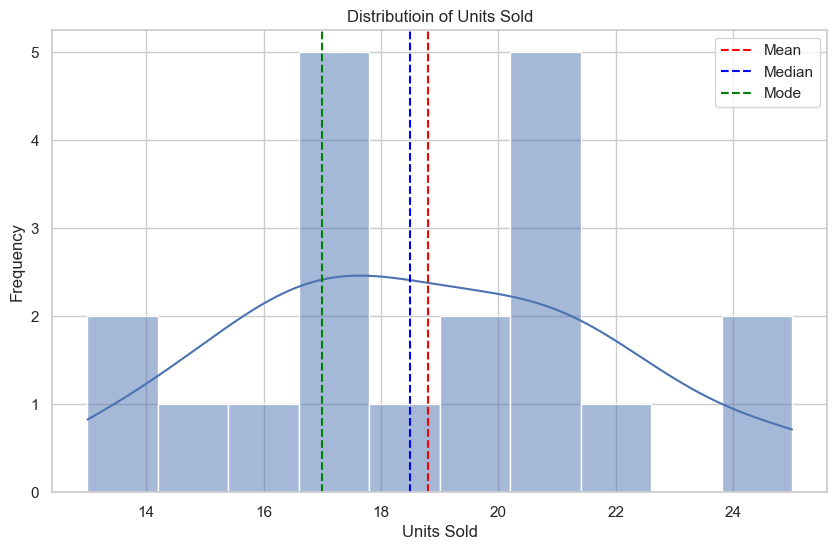

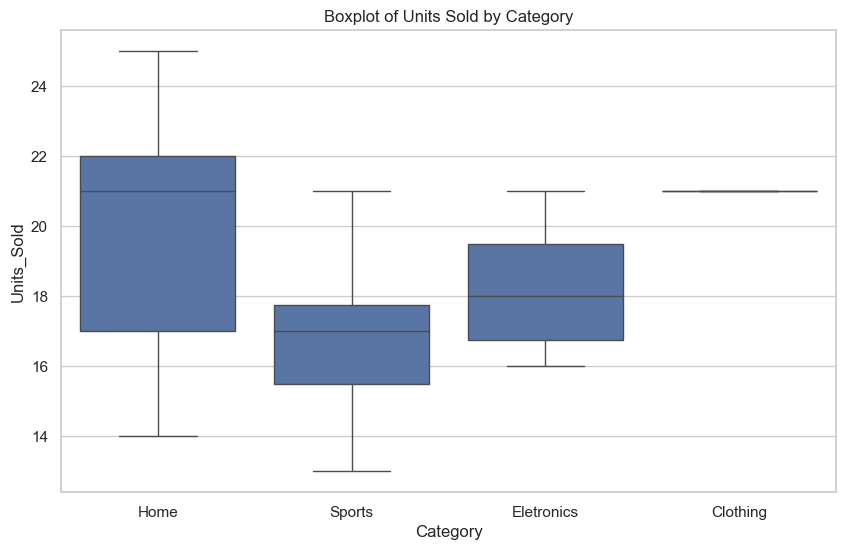

In [27]:
# Visualization

sns.set(style = "whitegrid")

# Plot distribution of units sold
plt.figure(figsize = (10,6))
sns.histplot(sales_data['units_sold'],bins = 10,kde = True)
plt.title('Distributioin of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.axvline(mean_sales, color = 'red', linestyle = '--',label = 'Mean')
plt.axvline(median_sales, color = 'blue' , linestyle = '--', label = 'Median')
plt.axvline(mode_sales, color = 'green' , linestyle = '--', label = 'Mode')
plt.legend()
plt.show()

# Boxplot for units sold by category
plt.figure(figsize = (10,6))
sns.boxplot(x = 'category', y= 'units_sold',data = sales_data)
plt.title('Boxplot of Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Units_Sold')
plt.show()